# Mahsa Massoud

## 810196635 

### Neaural networks and deep learning  - HW4

## Q1

In [1]:
from numpy.linalg import norm
import numpy as np


## Q2

In [2]:
def f(x, max_x):
    if x < 0:
        return 0
    elif x >= 0 and x < max_x:
        return x
    else:
        return 2

def f_mat(x, max_x):
    return np.array([f(x[i], max_x) for i in range(len(x))])

In [29]:
def end_condition(x):
    count = 0
    for i in range(x.shape[0]):

        if x[i] != 0.0:
            count += 1

    if count == 1 or len(np.unique(x)) == 2:
        return True

    return False


def MaxNet(input_arr, max_x, epsilon=0.13):
    W = np.zeros((len(input_arr),len(input_arr)))

    for i in range(len(input_arr)):
        for j in range(len(input_arr)):
            if i == j:
                W[i, j] = 1
            else:
                W[i, j] = -1* epsilon

    x = input_arr.copy()
    while not end_condition(x):
        x = f_mat(np.dot(W, x), max_x)
    for i in range(len(x)):
        if x[i] != 0:
            return input_arr[i], i

In [4]:
input_arr = np.array([1.2,1.1,0.5,1.5,1.13,0.8])
epsilon = 0.13


In [5]:
max_val = MaxNet(input_arr, 2)
print("Maximum value is in ", str(max_val[1]), "th cell of array, with value of ", str(max_val[0]), " .")

Maximum value is in  3 th cell of array, with value of  1.5  .


In [7]:
inv_input_arr = -1 * np.array([1.2,1.1,0.5,1.5,1.13,0.8])
max_val_2 = MaxNet(inv_input_arr, 2)

print("Maximum absolute value is in ", str(max_val[1]), "th cell of array, with value of ", str(max(max_val_2[0] ,max_val[0])), " .")

Maximum absolute value is in  3 th cell of array, with value of  1.5  .


## Q3

In [14]:
def MexicanHat(x, R1, R2, C1, C2, t_max):
  
    history = []
    x_i = x.copy()
    x_old = x_i

    for t in range(t_max):
        for i in range(len(x)):
            x_i[i] = C1 * np.sum(x_old[max(0, i-R1) : min(len(x)-1, i+R1+1)]) 
            x_i[i] += C2 * np.sum(x_old[max(0, i-R2) : max(0, i-R1)])
            x_i[i] += C2 * np.sum(x_old[min(len(x)-1, i+R1+1) : min(len(x)-1, i+R2+1)])

        x_old = f_mat(x_i.copy(), 2)
        history.append(x_old)
   
    return history

import matplotlib.pyplot as plt
def plot_res(history):

    plt.figure(figsize=(10, 10))

    for i in range(len(history)):
        plt.plot(history[i], label= str(19-i))

    plt.grid()
    plt.legend(loc= 'best')
    plt.show() 

    plt.figure()
    plt.plot(history[0], label= str(19))
    plt.grid()
    plt.legend()
    plt.show()

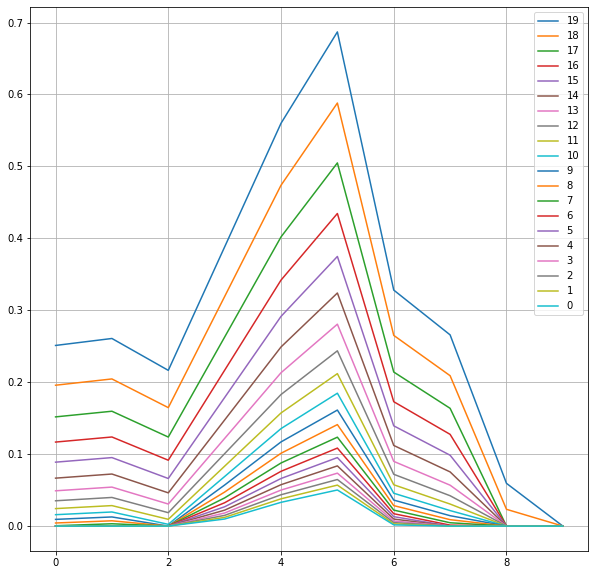

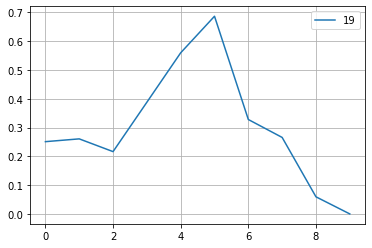

In [20]:
R1 = 0
R2 = 100
C1 = 0.89
C2 = -0.01
t_max = 20
input_arr = np.array([0.32, 0.33, 0.28, 0.47, 0.66, 0.80, 0.4, 0.33, 0.1 , 0.26])

history = MexicanHat(input_arr, R1, R2, C1, C2, t_max)
plot_res(history)

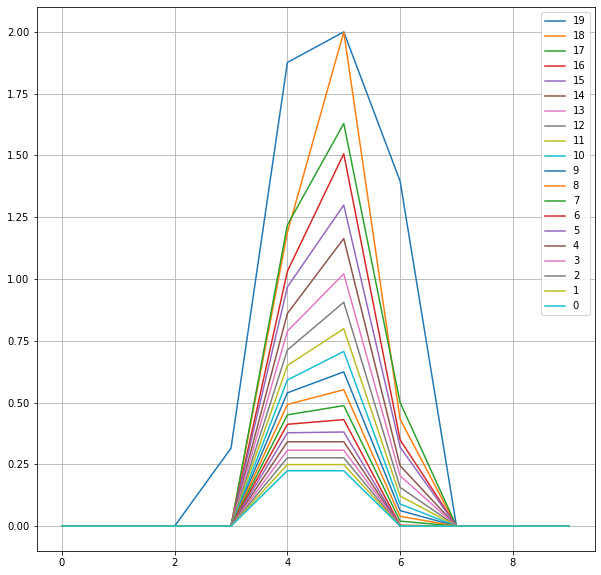

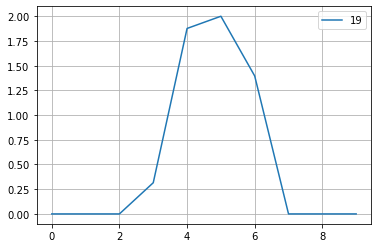

In [16]:
R1 = 1
R2 = 5
C1 = 0.45
C2 = -0.5
t_max = 20
input_arr = np.array([0.32, 0.33, 0.28, 0.47, 0.66, 0.80, 0.4, 0.33, 0.1 , 0.26])

history = MexicanHat(input_arr, R1, R2, C1, C2, t_max)
plot_res(history)

## Q4 - Hamming net

In [36]:
import numpy as np
V1 = np.array([1, 1, 1, 1, 1, 1])
V2 = np.array([-1, 1, -1, -1, 1, 1])
V3 = np.array([-1, -1, 1, 1, 1, 1])
V4 = np.array([-1, -1, 1, 1, -1, 1])
V5 = np.array([-1, 1, 1, -1, -1, -1])


V = [V1, V2, V3, V4, V5]
print(V)

[array([1, 1, 1, 1, 1, 1]), array([-1,  1, -1, -1,  1,  1]), array([-1, -1,  1,  1,  1,  1]), array([-1, -1,  1,  1, -1,  1]), array([-1,  1,  1, -1, -1, -1])]


In [18]:
e1 = np.array([ 1, -1,  1, -1,  1, -1])
e2 = np.array([-1,  1, -1,  1, -1,  -1])
e3 = np.array([ 1,  1,  1,  -1,  -1,  -1])


In [31]:
W = np.array([e1/2, e2/2, e3/2])
print(W)

[[ 0.5 -0.5  0.5 -0.5  0.5 -0.5]
 [-0.5  0.5 -0.5  0.5 -0.5 -0.5]
 [ 0.5  0.5  0.5 -0.5 -0.5 -0.5]]


In [21]:
out = data[np.where(x == max(x))[0]]
print(out)

[1.5]


In [38]:
def HammingNet(W, test):
    n = len(test)
    y_in = np.dot(W, test) + n/2
    return MaxNet(y_in, n)

for i in range(len(V)):
    sim_val, id = HammingNet(W, V[i])
    print("e" + str(id+1) + " is the closest vector to v" + str(i+1))
    print("value of similarity: ", sim_val)
    print("")

e1 is the closest vector to v1
value of similarity: 3.0

e2 is the closest vector to v2
value of similarity: 2.0

e1 is the closest vector to v3
value of similarity: 3.0

e2 is the closest vector to v4
value of similarity: 2.0

e3 is the closest vector to v5
value of similarity: 5.0

